In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
# Definir as pastas e classes
pasta_imagens = "/content/drive/MyDrive/Ciência da computação/7° Semestre/Visão Computacional/TrabalhoFinal/img_CNN"
pastas = ['cereja', 'cafe', 'banana']
num_classes = len(pastas)

# Lista para armazenar as imagens e rótulos
imagens = []
rotulos = []

# Definir o tamanho desejado das imagens
tamanho_desejado = (224, 224)

# Carregar as imagens e seus respectivos rótulos
for classe, pasta in enumerate(pastas):
    caminho_pasta = pasta_imagens + '/' + pasta
    arquivos_imagem = os.listdir(caminho_pasta)

    for arquivo_imagem in arquivos_imagem:
        caminho_imagem = caminho_pasta + '/' + arquivo_imagem
        imagem = cv2.imread(caminho_imagem)

        if imagem is None:
            print("Erro ao ler a imagem {}. Continuando para a próxima imagem.".format(caminho_imagem))
            continue

        # Redimensionar a imagem para o tamanho desejado
        imagem_redimensionada = cv2.resize(imagem, tamanho_desejado)

        # Adicionar a imagem redimensionada e o rótulo às listas
        imagens.append(imagem_redimensionada)
        rotulos.append(classe)

# Converter as listas em arrays numpy
imagens = np.array(imagens, dtype=object)
rotulos = np.array(rotulos)

In [ ]:
# Dividir o conjunto de dados em treinamento e teste
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(imagens, rotulos, test_size=0.2, random_state=42)

# Redimensionar os dados de entrada
train_data = np.reshape(train_data, (train_data.shape[0], train_data.shape[1], train_data.shape[2], 3))
test_data = np.reshape(test_data, (test_data.shape[0], test_data.shape[1], test_data.shape[2], 3))

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler

# Converter os rótulos para int32
train_labels_int = train_labels.astype(np.int32)
test_labels_int = test_labels.astype(np.int32)

# Redimensionar os dados para (n_samples, n_features)
train_data_reshaped = train_data.reshape(train_data.shape[0], -1)
test_data_reshaped = test_data.reshape(test_data.shape[0], -1)

# Pré-processamento dos dados
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data_reshaped)
test_data_scaled = scaler.transform(test_data_reshaped)

# Criar a arquitetura da CNN com o otimizador Adagrad
model_adg = tf.keras.Sequential()
model_adg.add(layers.Reshape(train_data.shape[1:], input_shape=train_data_scaled.shape[1:]))
model_adg.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_adg.add(layers.MaxPooling2D((2, 2)))
model_adg.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_adg.add(layers.MaxPooling2D((2, 2)))
model_adg.add(layers.Flatten())
model_adg.add(layers.Dense(64, activation='relu'))
model_adg.add(layers.Dense(num_classes, activation='softmax'))

# Compilar o modelo com o otimizador Adagrad
optimizer_adg = tf.keras.optimizers.Adagrad(learning_rate=0.0001)
model_adg.compile(optimizer=optimizer_adg, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Converter os dados de treinamento e teste em tensores
train_data_tensor = tf.convert_to_tensor(train_data_scaled, dtype=tf.float32)
test_data_tensor = tf.convert_to_tensor(test_data_scaled, dtype=tf.float32)
train_labels_tensor = tf.convert_to_tensor(train_labels_int, dtype=tf.int32)
test_labels_tensor = tf.convert_to_tensor(test_labels_int, dtype=tf.int32)

# Treinar o modelo
history_adg = model_adg.fit(train_data_tensor, train_labels_tensor, epochs=20, validation_data=(test_data_tensor, test_labels_tensor))

Epoch 1/20
32/32 [==============================] - 3s 55ms/step - loss: 1.0867 - accuracy: 0.3795 - val_loss: 1.0692 - val_accuracy: 0.4471
Epoch 2/20
32/32 [==============================] - 2s 51ms/step - loss: 1.0576 - accuracy: 0.4818 - val_loss: 1.0530 - val_accuracy: 0.4745
Epoch 3/20
32/32 [==============================] - 2s 54ms/step - loss: 1.0324 - accuracy: 0.5379 - val_loss: 1.0297 - val_accuracy: 0.4275
Epoch 4/20
32/32 [==============================] - 2s 47ms/step - loss: 1.0133 - accuracy: 0.5310 - val_loss: 1.0165 - val_accuracy: 0.6118
Epoch 5/20
32/32 [==============================] - 2s 47ms/step - loss: 0.9955 - accuracy: 0.5615 - val_loss: 1.0034 - val_accuracy: 0.6039
Epoch 6/20
32/32 [==============================] - 1s 44ms/step - loss: 0.9739 - accuracy: 0.5900 - val_loss: 1.0514 - val_accuracy: 0.4039
Epoch 7/20
32/32 [==============================] - 2s 56ms/step - loss: 0.9627 - accuracy: 0.5831 - val_loss: 0.9793 - val_accuracy: 0.6314
Epoch 8/20
32

In [ ]:
# Criar a arquitetura da CNN
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=train_data.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Converter os dados de treinamento e teste em tensores
train_data = tf.convert_to_tensor(train_data, dtype=tf.float32)
test_data = tf.convert_to_tensor(test_data, dtype=tf.float32)
train_labels = tf.convert_to_tensor(train_labels, dtype=tf.int32)
test_labels = tf.convert_to_tensor(test_labels, dtype=tf.int32)

# Treinar o modelo
history = model.fit(train_data, train_labels, epochs=20, validation_data=(test_data, test_labels))

Epoch 1/20
32/32 [==============================] - 4s 56ms/step - loss: 416.4361 - accuracy: 0.3835 - val_loss: 0.9763 - val_accuracy: 0.5647
Epoch 2/20
32/32 [==============================] - 1s 43ms/step - loss: 0.8250 - accuracy: 0.7011 - val_loss: 1.0754 - val_accuracy: 0.6353
Epoch 3/20
32/32 [==============================] - 1s 44ms/step - loss: 0.3669 - accuracy: 0.8928 - val_loss: 1.2018 - val_accuracy: 0.6118
Epoch 4/20
32/32 [==============================] - 1s 43ms/step - loss: 0.1406 - accuracy: 0.9676 - val_loss: 2.8165 - val_accuracy: 0.6667
Epoch 5/20
32/32 [==============================] - 1s 44ms/step - loss: 0.1061 - accuracy: 0.9794 - val_loss: 1.8946 - val_accuracy: 0.6353
Epoch 6/20
32/32 [==============================] - 1s 44ms/step - loss: 0.0858 - accuracy: 0.9862 - val_loss: 2.0521 - val_accuracy: 0.6314
Epoch 7/20
32/32 [==============================] - 1s 43ms/step - loss: 0.0878 - accuracy: 0.9833 - val_loss: 3.6769 - val_accuracy: 0.6235
Epoch 8/20


In [ ]:
# Criar a arquitetura da CNN
model_lr = tf.keras.Sequential()
model_lr.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=train_data.shape[1:]))
model_lr.add(layers.MaxPooling2D((2, 2)))
model_lr.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_lr.add(layers.MaxPooling2D((2, 2)))
model_lr.add(layers.Flatten())
model_lr.add(layers.Dense(64, activation='relu'))
model_lr.add(layers.Dense(num_classes, activation='softmax'))

# Definir taxa de aprendizado ajustada
learning_rate = 0.0001
optimizer_lr = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compilar o modelo
model_lr.compile(optimizer=optimizer_lr, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Converter os dados de treinamento e teste em tensores
train_data_lr = tf.convert_to_tensor(train_data, dtype=tf.float32)
test_data_lr = tf.convert_to_tensor(test_data, dtype=tf.float32)
train_labels_lr = tf.convert_to_tensor(train_labels, dtype=tf.int32)
test_labels_lr = tf.convert_to_tensor(test_labels, dtype=tf.int32)

# Treinar o modelo
history_lr = model_lr.fit(train_data_lr, train_labels_lr, epochs=20, validation_data=(test_data_lr, test_labels_lr))

Epoch 1/20
32/32 [==============================] - 3s 51ms/step - loss: 100.1221 - accuracy: 0.3972 - val_loss: 14.9636 - val_accuracy: 0.5176
Epoch 2/20
32/32 [==============================] - 1s 44ms/step - loss: 9.5231 - accuracy: 0.6313 - val_loss: 3.9244 - val_accuracy: 0.5922
Epoch 3/20
32/32 [==============================] - 1s 45ms/step - loss: 2.4055 - accuracy: 0.6755 - val_loss: 3.7663 - val_accuracy: 0.5608
Epoch 4/20
32/32 [==============================] - 1s 45ms/step - loss: 1.1258 - accuracy: 0.7886 - val_loss: 1.8538 - val_accuracy: 0.7098
Epoch 5/20
32/32 [==============================] - 1s 45ms/step - loss: 0.8143 - accuracy: 0.8240 - val_loss: 1.6926 - val_accuracy: 0.7098
Epoch 6/20
32/32 [==============================] - 1s 44ms/step - loss: 0.3023 - accuracy: 0.9007 - val_loss: 1.7839 - val_accuracy: 0.7059
Epoch 7/20
32/32 [==============================] - 2s 48ms/step - loss: 0.2303 - accuracy: 0.9223 - val_loss: 1.7052 - val_accuracy: 0.7059
Epoch 8/20

In [ ]:
accuracy = [f"{acc*100:.2f}%" for acc in history.history['accuracy']]
print("Acurácia durante o treinamento:")
print(accuracy)
print()

# Imprimir a perda durante o treinamento com duas casas decimais
loss = [f"{l:.2f}" for l in history.history['loss']]
print("Perda durante o treinamento:")
print(loss)
print()

Acurácia durante o treinamento:
['38.35%', '70.11%', '89.28%', '96.76%', '97.94%', '98.62%', '98.33%', '99.51%', '99.31%', '99.41%', '98.53%', '98.62%', '99.90%', '99.90%', '99.90%', '100.00%', '99.71%', '98.43%', '95.28%', '98.43%']

Perda durante o treinamento:
['416.44', '0.82', '0.37', '0.14', '0.11', '0.09', '0.09', '0.03', '0.04', '0.03', '0.06', '0.06', '0.02', '0.01', '0.00', '0.00', '0.01', '0.08', '0.21', '0.06']



In [ ]:
# Imprimir a acurácia durante o treinamento com otimizador SGD
accuracy_adg = [f"{acc*100:.2f}%" for acc in history_adg.history['accuracy']]
print("Acurácia durante o treinamento (ADAM):")
print(accuracy_adg)
print()

# Imprimir a perda durante o treinamento com otimizador SGD
loss_adg = [f"{l:.2f}" for l in history_adg.history['loss']]
print("Perda durante o treinamento (ADAM):")
print(loss_adg)
print()

Acurácia durante o treinamento (SGD):
['37.95%', '48.18%', '53.79%', '53.10%', '56.15%', '59.00%', '58.31%', '61.75%', '64.90%', '62.83%', '63.13%', '64.90%', '64.31%', '66.96%', '66.27%', '66.76%', '67.75%', '69.12%', '68.24%', '68.73%']

Perda durante o treinamento (SGD):
['1.09', '1.06', '1.03', '1.01', '1.00', '0.97', '0.96', '0.95', '0.93', '0.92', '0.90', '0.90', '0.88', '0.87', '0.86', '0.85', '0.84', '0.83', '0.83', '0.82']



In [ ]:
# Imprimir a acurácia durante o treinamento com taxa de aprendizado ajustada
accuracy_lr = [f"{acc*100:.2f}%" for acc in history_lr.history['accuracy']]
print("Acurácia durante o treinamento (Learning Rate Ajustada):")
print(accuracy_lr)
print()

# Imprimir a perda durante o treinamento com taxa de aprendizado ajustada
loss_lr = [f"{l:.2f}" for l in history_lr.history['loss']]
print("Perda durante o treinamento (Learning Rate Ajustada):")
print(loss_lr)
print()

Acurácia durante o treinamento (Learning Rate Ajustada):
['39.72%', '63.13%', '67.55%', '78.86%', '82.40%', '90.07%', '92.23%', '95.18%', '98.33%', '98.92%', '98.72%', '99.71%', '99.71%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%']

Perda durante o treinamento (Learning Rate Ajustada):
['100.12', '9.52', '2.41', '1.13', '0.81', '0.30', '0.23', '0.14', '0.06', '0.04', '0.04', '0.02', '0.02', '0.01', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00']



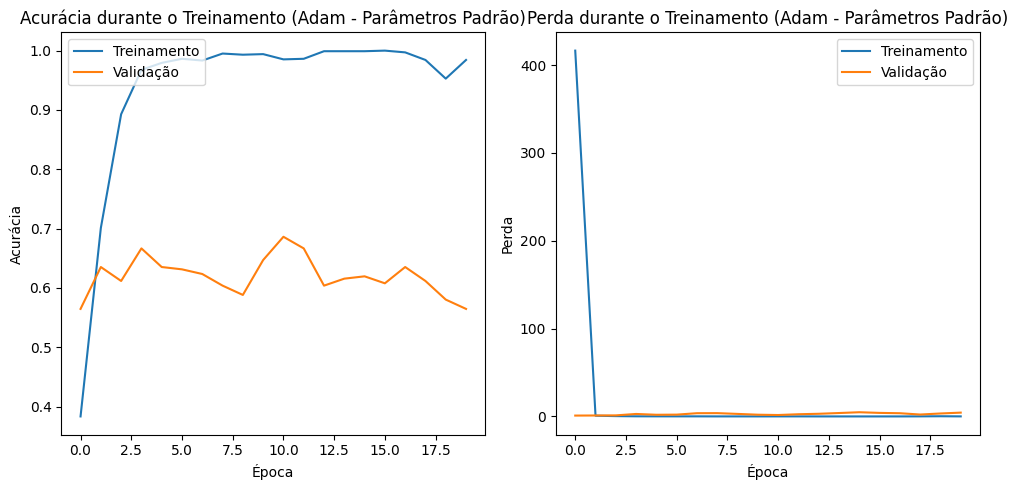

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia durante o Treinamento (Adam - Parâmetros Padrão)')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treinamento', 'Validação'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perda durante o Treinamento (Adam - Parâmetros Padrão)')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(['Treinamento', 'Validação'], loc='upper right')

plt.tight_layout()
plt.show()

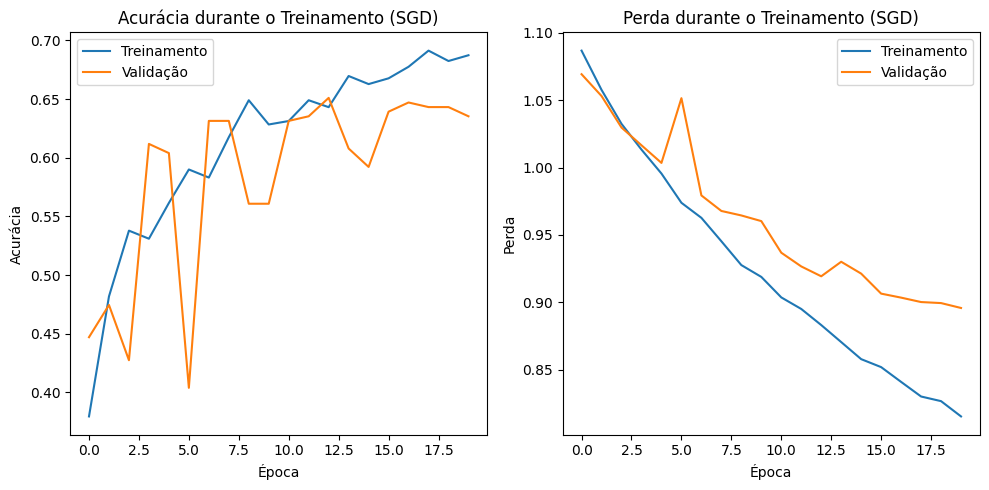

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_adg.history['accuracy'])
plt.plot(history_adg.history['val_accuracy'])
plt.title('Acurácia durante o Treinamento (SGD)')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treinamento', 'Validação'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_adg.history['loss'])
plt.plot(history_adg.history['val_loss'])
plt.title('Perda durante o Treinamento (SGD)')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(['Treinamento', 'Validação'], loc='upper right')

plt.tight_layout()
plt.show()

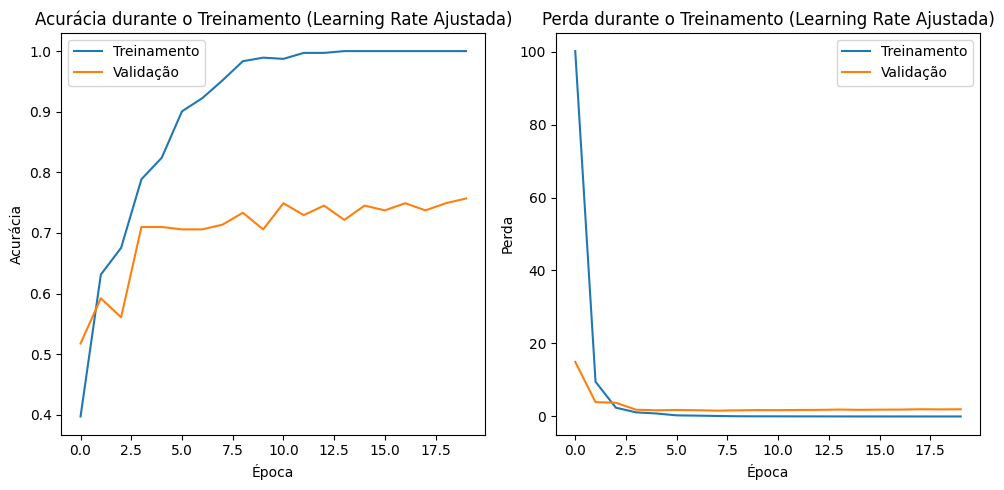

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_lr.history['accuracy'])
plt.plot(history_lr.history['val_accuracy'])
plt.title('Acurácia durante o Treinamento (Learning Rate Ajustada)')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treinamento', 'Validação'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_lr.history['loss'])
plt.plot(history_lr.history['val_loss'])
plt.title('Perda durante o Treinamento (Learning Rate Ajustada)')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(['Treinamento', 'Validação'], loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# Salvar o modelo com o nome model_lr.h5
model.save('/content/drive/MyDrive/Ciência da computação/7° Semestre/Visão Computacional/TrabalhoFinal/img_inferencia/model_CNN.h5')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2

# Carregar o modelo treinado
modelo = load_model('/content/drive/MyDrive/Ciência da computação/7° Semestre/Visão Computacional/TrabalhoFinal/img_inferencia/model_CNN.h5')

# Carregar a imagem a ser reconhecida
caminho_imagem = '/content/drive/MyDrive/Ciência da computação/7° Semestre/Visão Computacional/TrabalhoFinal/img_inferencia/img.png'
imagem = cv2.imread(caminho_imagem)

# Redimensionar a imagem para o tamanho desejado
tamanho_desejado = (224, 224)
imagem_redimensionada = cv2.resize(imagem, tamanho_desejado)

# Realizar a previsão
previsao = modelo.predict(imagem_redimensionada.reshape(1, 224, 224, 3))

# Mapear as classes para seus respectivos rótulos
classes = ['cereja', 'cafe', 'banana']
resultado = previsao.argmax(axis=-1)
classe_prevista = classes[resultado[0]]

# Exibir o resultado da previsão
print("A imagem é classificada como:", classe_prevista)

1/1 [==============================] - 0s 338ms/step
A imagem é classificada como: banana
